In [34]:
import sys
sys.path.append("../")

In [35]:
import pickle

import numpy as np
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.svm import LinearSVC
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score

from VehicleTracking import *
from FeatureExtractionPipeline import HogExtractor, SpatialBining, ColorHistogram, ColorSpaceConverter, \
    OptionalBranch, OptionalPCA, AcceptEmptyMinMaxScaler
     
%matplotlib inline

In [36]:
with open('../models/gridsearch.p', 'rb') as f:
    clf = pickle.load(f)

In [4]:
clf.best_params_

{'clf__C': 1,
 'features__chist__chist_csc__cspace': 'HLS',
 'features__chist__chist_optional__use': True,
 'features__chist__chist_pca__n_components': None,
 'features__chist__color_histogram__bins': 32,
 'features__hog__hog_csc__cspace': 'LAB',
 'features__hog__hog_extractor__cells_per_block': 2,
 'features__hog__hog_extractor__orient': 18,
 'features__hog__hog_extractor__pix_per_cell': 8,
 'features__hog__hog_pca__n_components': None,
 'features__sb__sb_csc__cspace': 'LAB',
 'features__sb__sb_optional__use': True,
 'features__sb__spatial_bining__bins': 32}

In [5]:
top20 = np.argsort(clf.cv_results_['mean_test_score'])[-20:]

In [6]:
np.sort(clf.cv_results_['mean_test_score'][top20])[::-1]

array([ 0.99951835,  0.99951835,  0.99951835,  0.99951835,  0.9995116 ,
        0.9995116 ,  0.9995116 ,  0.9995116 ,  0.99950583,  0.99950583,
        0.99950583,  0.99950583,  0.99948271,  0.99948271,  0.99948271,
        0.99948271,  0.99948029,  0.99948029,  0.99948029,  0.99947981])

In [7]:
for i, param in enumerate(np.array(clf.cv_results_['params'])[top20]):
    print('Params', i)
    print(param)
    for key, val in param.items():
        print(key, val)
        
    print()

Params 0
{'clf__C': 1, 'features__chist__chist_pca__n_components': None, 'features__hog__hog_extractor__orient': 18, 'features__sb__spatial_bining__bins': 32, 'features__hog__hog_csc__cspace': 'LAB', 'features__hog__hog_extractor__cells_per_block': 2, 'features__chist__chist_optional__use': True, 'features__chist__color_histogram__bins': 32, 'features__sb__sb_optional__use': True, 'features__hog__hog_pca__n_components': None, 'features__chist__chist_csc__cspace': 'YCrCb', 'features__sb__sb_csc__cspace': 'LAB', 'features__hog__hog_extractor__pix_per_cell': 8}
clf__C 1
features__chist__chist_pca__n_components None
features__hog__hog_extractor__orient 18
features__sb__spatial_bining__bins 32
features__hog__hog_csc__cspace LAB
features__hog__hog_extractor__cells_per_block 2
features__chist__chist_optional__use True
features__chist__color_histogram__bins 32
features__sb__sb_optional__use True
features__hog__hog_pca__n_components None
features__chist__chist_csc__cspace YCrCb
features__sb__sb

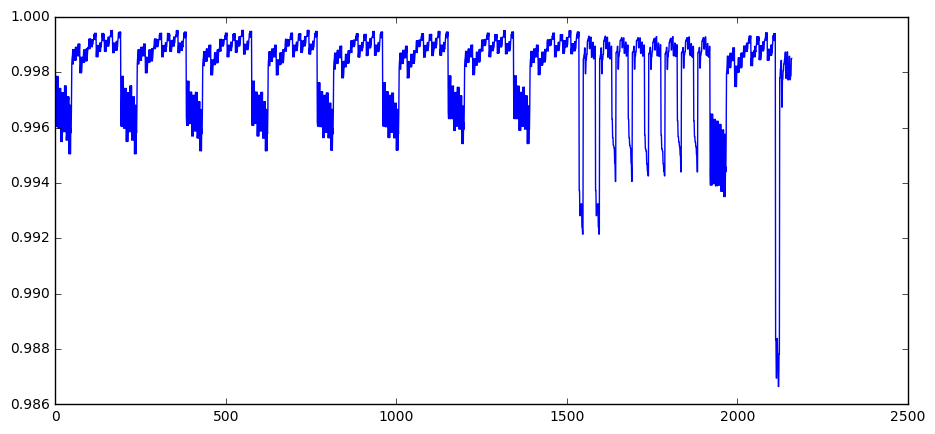

In [8]:
plt.figure(figsize=(11,5))
plt.plot(clf.cv_results_['mean_test_score'])

In [9]:
clf.cv_results_['mean_test_score'].min()

0.98664929961581238

In [10]:
clf.best_score_

0.99951835312044135

In [11]:
with open('../data/data.p', 'rb') as f:
    data = pickle.load(f)

In [12]:
X_val, y_val = data['val']

# Feature extraction result

In [13]:
clf.best_estimator_.score(X_val, y_val)

0.99227292608251927

In [14]:
pred = clf.predict(X_val)
roc_auc_score(y_val, pred)

0.99212466088380724

# C gridsearch

In [15]:
with open('../models/gridsearch_c.p', 'rb') as f:
    clf_c = pickle.load(f)

In [16]:
clf_c.best_estimator_.score(X_val, y_val)

0.99212713223501969

In [17]:
pred = clf_c.predict(X_val)
roc_auc_score(y_val, pred)

0.99193734645241205

# Retrain an complete train set

In [18]:
with open('../models/gridsearch_all_train.p', 'rb') as f:
    clf_all_train = pickle.load(f)

In [19]:
clf_all_train.best_estimator_.score(X_val, y_val)

0.99460562764251348

In [20]:
pred = clf_all_train.predict(X_val)
roc_auc_score(y_val, pred)

0.99449655808135518

# Retrain an complete train set + hrad negative mining

In [21]:
with open('../models/gridsearch_hnm.p', 'rb') as f:
    clf_hnm = pickle.load(f)

In [22]:
clf_hnm.best_estimator_.score(X_val, y_val)

0.98950284298002622

In [23]:
pred = clf_hnm.predict(X_val)
roc_auc_score(y_val, pred)

0.98921441034319713

# Adj Dataset

In [24]:
with open('../models/svm_pca.p', 'rb') as f:
    clf_pca = pickle.load(f)

In [25]:
clf_pca.score(X_val, y_val)

0.99460562764251348

In [26]:
pred = clf_pca.predict(X_val)
roc_auc_score(y_val, pred)

0.99449655808135518

# Opencv hog

In [41]:
with open('../models/gridsearch_opencv_all.p', 'rb') as f:
    clf_opencv = pickle.load(f)

In [38]:
clf_opencv.score(X_val, y_val)

0.99266701685395553

In [39]:
pred = clf_opencv.predict(X_val)
roc_auc_score(y_val, pred)

0.96627250157720546

In [30]:
clf_opencv.best_params_

{'clf__C': 1,
 'features__chist__chist_csc__cspace': 'LAB',
 'features__chist__chist_optional__use': True,
 'features__chist__chist_pca__n_components': None,
 'features__chist__color_histogram__bins': 32,
 'features__hog__hog_csc__cspace': 'LAB',
 'features__hog__hog_extractor__gamma_correction': True,
 'features__hog__hog_extractor__layout': (16, 8, 8),
 'features__hog__hog_extractor__orient': 9,
 'features__hog__hog_extractor__win_sigma': 1,
 'features__hog__hog_pca__n_components': None,
 'features__sb__sb_csc__cspace': 'LAB',
 'features__sb__sb_optional__use': True,
 'features__sb__spatial_bining__bins': 32}

In [44]:
clf_opencv.cv_results_

{'mean_fit_time': array([ 88.36760871]),
 'mean_score_time': array([ 7.6782856]),
 'mean_test_score': array([ 0.99200017]),
 'mean_train_score': array([ 0.99977337]),
 'param_clf__C': masked_array(data = [1],
              mask = [False],
        fill_value = ?),
 'param_features__chist__chist_csc__cspace': masked_array(data = ['LAB'],
              mask = [False],
        fill_value = ?),
 'param_features__chist__chist_optional__use': masked_array(data = [True],
              mask = [False],
        fill_value = ?),
 'param_features__chist__chist_pca__n_components': masked_array(data = [None],
              mask = [False],
        fill_value = ?),
 'param_features__chist__color_histogram__bins': masked_array(data = [32],
              mask = [False],
        fill_value = ?),
 'param_features__hog__hog_csc__cspace': masked_array(data = ['LAB'],
              mask = [False],
        fill_value = ?),
 'param_features__hog__hog_extractor__gamma_correction': masked_array(data = [True],
   

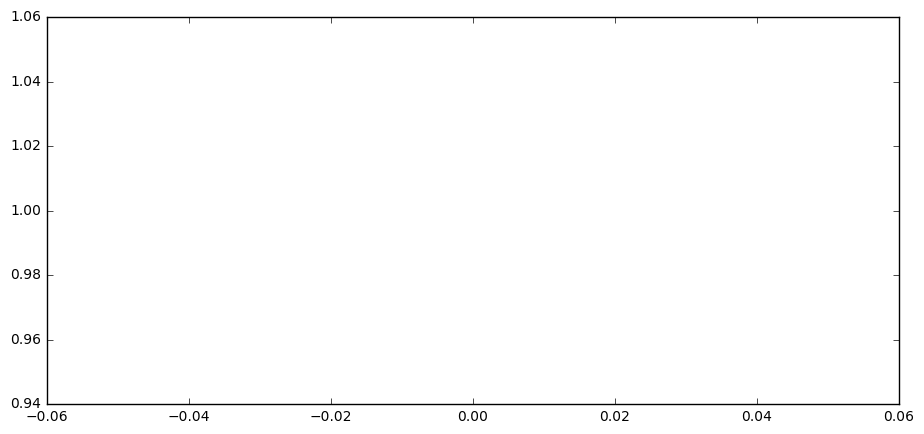

In [42]:
plt.figure(figsize=(11,5))
plt.plot(clf_opencv.cv_results_['mean_test_score'])